# Clase 2 - Regresión Lineal - Partición de datos

## Carga de Librerias

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets #Contiene datasets predeterminados

## Funciones

Funciones para calculo de errores 

In [2]:
#FUNCION PARA OBTENER EL ERROR CUADRATICO MEDIO
def rmse(objetivo, estimaciones):
    return np.sqrt(metrics.mean_squared_error(objetivo, estimaciones)
                  )
#FUNCION PARA R2 AJUSTADO
def adjusted_r2(objetivo, estimaciones, n, k):
    r2 = metrics.r2_score(objetivo, estimaciones)
    return 1 - (1-r2)*(n-1) / (n - k - 1)

#EVALUAR MODELO
#objetivo -> Variable objetivo a predecir
#estimaciones -> Datos calculados con el modelo calculado
#n -> Numero de observaciones (renglones-normalmente)
#k -> Numero de variables independientes (columnas normalmente)
def evaluar_modelo(objetivo, estimaciones, n, k):
    return {
              #DEVUELVE EL ERROR CUADRATICO MEDIO
              "rmse": rmse(objetivo, estimaciones),
              #DEVUELVE EL ERROR ABSOLUTO PROMEDIO
              "mae": metrics.mean_absolute_error(objetivo, estimaciones),
              #DEVUELVE EL R2 AJUSTADO
              "adjusted_r2": adjusted_r2(objetivo, estimaciones, n, k)
           }


## Ejemplo - Utilizando todos los valores

Primero de carga el dataset

In [3]:
boston = datasets.load_boston(); # Diccionario
boston.keys();
#SALIDA dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
#data : datos
#target : variable objetivo
#feature_names : nombres de variables
#DESC : descripcion de los datos
#filename : nombre del archivo y ruta

c:\Users\felip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

Nótese que los keys dan acceso a diferentes datos del dataset.

Contrucción del modelo

In [4]:
#boston[data] contiene las primera 12 columnas
#boston[target] contiene la ultima columna que es la variable a predecir
modelo_ols = LinearRegression()
modelo_ols.fit(X=boston['data'],y=boston['target'])
modelo_ols_preds = modelo_ols.predict(boston['data'])
modelo_ols_preds[0:5] #Primeras 5 predicciones

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

Evaluando el modelo

In [5]:
resultados = {}
n = boston['data'].shape[0]
k = len(modelo_ols.coef_)
resultados['ols'] = evaluar_modelo(boston['target'],modelo_ols_preds,n,k)
resultados['ols']

{'rmse': 4.679191295697282,
 'mae': 3.270862810900317,
 'adjusted_r2': 0.7337897263724629}

## Haciendo Split de los datos - Entrenamiento y Prueba

Hasta este momento hemos usado todos los datos como entrenamiento, de modo que posiblemente tengamos problemas de sobreajuste y por lo tanto tengamos errores si introducimos datos nuevos. 

**Lo que haremos entonces es dividir la tabla para reentrenar el modelo.**

In [6]:
# Libreria para hacer split
from sklearn.model_selection import train_test_split

**División de datos de prueba y entrenamiento**

Se da los arreglos que contienen que contienen toda la tabla.

El **test_size** elige el porcentaje de datos para usar como prueba, los datos son elegido aleatoriamente.

**random_state** elige la semilla para la generación de números aleatorios.

In [7]:
print("Tamaño de los datos independientes: ")
print(boston['data'].shape)

#Division
X_train, X_test, y_train, y_test = train_test_split(boston["data"], 
                                                    boston["target"],
                                                    test_size=0.33, 
                                                    random_state=13)

print("Tamaño de los datos de entrenamiento: ")
print(X_train.shape, y_train.shape)
print("Tamaño de los datos de prueba: ")
print(X_test.shape, y_test.shape)

Tamaño de los datos independientes: 
(506, 13)
Tamaño de los datos de entrenamiento: 
(339, 13) (339,)
Tamaño de los datos de prueba: 
(167, 13) (167,)


### Creación del modelo con datos de entrenamiento

Utilizando unicamente los valores de entrenamiento

In [8]:
modelo_ols = LinearRegression()
# Se ajusta el modelo con todos los datos de entrenamiento
modelo_ols.fit(X = X_train, y = y_train)
modelo_ols_train_preds = modelo_ols.predict(X_train)

#Tamaños
n = X_train.shape[0] # Registros o renglones
k = len(modelo_ols.coef_) # Variables independientes
#Obteniendo los resultados del modelo recién entrenado
resultados["ols_train"] = evaluar_modelo(
                                          y_train,
                                          modelo_ols_train_preds,
                                          n,
                                          k
                                        ) 

resultados['ols_train']

{'rmse': 4.7217324545168475,
 'mae': 3.30086799221536,
 'adjusted_r2': 0.7314907015939042}

Hasta este momento solo se han utilizado los datos de entrenamiento unicamente

Ahora se utiliza los datos de prueba

In [9]:
modelo_ols_test_preds = modelo_ols.predict(X_test)
# Notese que el modelo no se altera, sigue entrenado con los datos de entrenamiento
#Tamaños
n = X_test.shape[0] # Registros o renglones respecto de la prueba
k = len(modelo_ols.coef_) # Variables independientes
resultados['ols_test'] = evaluar_modelo(y_test,modelo_ols_test_preds,n,k)
resultados['ols_test']

{'rmse': 4.784178251750683,
 'mae': 3.558433720909813,
 'adjusted_r2': 0.6887158654171637}

Presentando resultados
- **ols** Modelo utilizando todos los datos
- **ols_train** Modelo utilizando los datos de entrenamiento
- **ols_test** Modelo utilizando los datos de prueba 

In [10]:
data = pd.DataFrame(resultados)
data

,ols,ols_train,ols_test
rmse,4.679191,4.721732,4.784178
mae,3.270863,3.300868,3.558434
adjusted_r2,0.733790,0.731491,0.688716


Como se observa, al momento de utilizar los datos de de entrenamiento y prueba se tiene un peor rendimiento.

**Se debe tener menores errores cuando evaluamos el entrenamiento a diferencia de cuando evaluamos la prueba**

## Validación cruzada

Ahora se probará el modelo con diferentes semillas

In [11]:
resultados2 = {}

#Probando para la semilla 42
X_train, X_test, y_train, y_test = train_test_split(
     boston["data"], boston["target"],
     test_size=0.33, random_state=42
)

#Creación del modelo
modelo_ols = LinearRegression()
modelo_ols.fit(X=X_train,y=y_train)
modelo_ols_train_preds = modelo_ols.predict(X_train)
modelo_ols_test_preds = modelo_ols.predict(X_test)

#Resultados para prueba y entrenamiento
resultados2["ols_train"] = evaluar_modelo(
    y_train,
    modelo_ols_train_preds,
    X_train.shape[0],
    len(modelo_ols.coef_)
)

resultados2["ols_test"] = evaluar_modelo(
    y_test,
    modelo_ols_test_preds,
    X_test.shape[0],
    len(modelo_ols.coef_)
)
data2=pd.DataFrame(resultados2)
data2


,ols_train,ols_test
rmse,4.794269,4.552365
mae,3.376419,3.148256
adjusted_r2,0.728804,0.702889


**¡El error en los datos de test es menor que en los de entrenamiento!** 

**¿Por qué?**

Sencillamente, por que ha dado la casualidad de que hemos separado los datos de una forma que los datos de test son muy fáciles de estimar.

Para ver la magnitud del error en el que estamos cayendo al hacer una sola separación entre test y entrenamiento, vamos a probar diferentes semillas y ver cual es el rango del error que se puede obtener.

Función para probar diferentes semillas

In [12]:
model = LinearRegression()
results = []
def test_seed(seed):
    #SE CREA EL MODELO RECIBIENDO COMO PARAMETRO EL NUMERO DE SEMILLA
    X_train, X_test, y_train, y_test = train_test_split(boston["data"], boston["target"],test_size=0.33, random_state=seed)
    #SOLO SE OBTIENEN LAS PREDICCIONES DE LA PRUEBA
    test_preds = model.fit(X_train, y_train).predict(X_test)
    #SE OBTIENE EL ERROR DE LAS PRUEBAS
    seed_rmse = rmse(y_test, test_preds)
    #SE INSERTAN EN UNA LISTA LOS RESULTADOS, EL ERROR Y LA SEMILLA UTILIZADA
    results.append([seed_rmse, seed])

Probando las diferentes semillas

In [13]:
for i in range(1000):
  test_seed(i)

Observando la peor y mejor semilla

In [14]:
results_sorted = sorted(results, key=lambda x:x[0], reverse = False)

print("Semilla con menor error: ")
print(results_sorted[0])

print("Semilla con mayor error: ")
print(results_sorted[-1])

Semilla con menor error: 
[3.63131421707693, 635]
Semilla con mayor error: 
[6.788054714003124, 645]


Utilizando la filosofia de validación cruzada

In [15]:
from sklearn.model_selection import cross_val_score

X = boston['data']
y = boston['target']

#estimator -> Modelo, en este caso lineal
#X -> variables independientes
#y -> Variables Objetivo o a estimar
#cv -> Numero de repeticiones
#scoring -> La variable de la que toma referencia para hacer un mejor modelo
#EN ESTE CASO HACE LA PARTICION DE DATOS DE MANERA ALEATORIA POR LO QUE EL MODELO ES MEJOR
#EN ESTE CASO NO TOMAR EN CUENTA EL SIGNO MENOS
results_cross_val = cross_val_score(estimator=modelo_ols,
                                    X = X,
                                    y = y,
                                    scoring = 'neg_mean_squared_error',
                                    cv=10
                                    )

print("Resultados de la validación cruzada: ")
print(results_cross_val)

print("Media de los resultados de la validación cruzada: ")
print(results_cross_val.mean())

Resultados de la validación cruzada: 
[  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
Media de los resultados de la validación cruzada: 
-34.70525594452496


Se define una función para calcular el error cuadratico medio de un modelo

In [16]:
#ESTA FUNCION OBTIENE LA RAIZ DEL ERROR CUADRATICO MEDIO DE UN MODELO
def rmse_cross_val(estimator, X, y):
    y_pred = estimator.predict(X)
    return np.sqrt(metrics.mean_squared_error(y, y_pred))

En este caso se hace la prueba de validación cruzada de 10 hasta 200 pruebas

In [17]:
resultados_cv = []
for i in range(10,200):
  cv_rmse = cross_val_score(estimator=modelo_ols, X=X,y=y,scoring=rmse_cross_val, cv=i).mean()
  resultados_cv.append(cv_rmse)

Gráficas

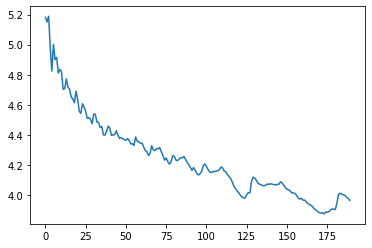

In [18]:
import matplotlib.pyplot as plt
plt.plot(resultados_cv)
plt.show()

En la gráfica se observa que entre mas particiones el error disminuye

**CROSS VALIDATE PRACTICAMENTE HACE LO MISMO CON LAS DIFERENTES PARTICIONES PERO TOMANDO MAS DE UN SCORING COMO REFERENCIA**

In [19]:
from sklearn.model_selection import cross_validate
scoring = {"mae": "neg_mean_absolute_error", "rmse": rmse_cross_val}
estimator = modelo_ols
scores = cross_validate(estimator, boston["data"], boston["target"], scoring=scoring, cv=100, return_train_score=True)

last = pd.DataFrame(scores).mean()
last

fit_time      0.000628
score_time    0.000483
test_mae     -3.511687
train_mae    -3.270699
test_rmse     4.184166
train_rmse    4.676971
dtype: float64